## Importing Libraries

In [100]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

In [101]:
# Libraries for Model and CNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

In [102]:
# Setting Default Seaborn Style
sns.set(style='white', context='notebook', palette='deep')

# Data Preprocessing

## Importing the Data

In [103]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [104]:
train.shape, test.shape

((42000, 785), (28000, 784))

In [105]:
# Checking for Null Valuese in Dataset
print("Null Values in Train set : ", train.isnull().any().sum())
print("Null Values in Test set : ", test.isnull().any().sum())

Null Values in Train set :  0
Null Values in Test set :  0


In [106]:
# Seperating Dependent Variable from Other Features
y = train.label
X = train.drop(columns=["label"], axis=1)

In [107]:
y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

E:\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


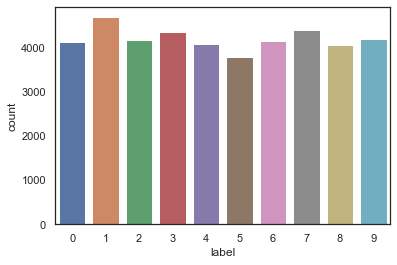

In [108]:
sns.countplot(y)
plt.show()

## Feature Scaling

In [109]:
# Normalizing the images
X = X / 255.0
test = test / 255.0

## Resizing/Reshaping the images

In [110]:
# height = 28px, width = 28px
X = X.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

## Label encoding

In [111]:
y = to_categorical(y, num_classes = 10)

## Splitting training and vaidation set

In [112]:
random_seed = 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=random_seed)

## Viewing Some Sample of images in Dataset

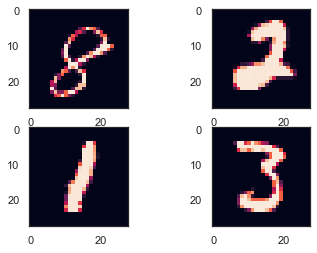

In [113]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(X_train[0])
axs[0, 1].imshow(X_train[10])
axs[1, 0].imshow(X_train[20])
axs[1, 1].imshow(X_train[30])

# CNN

## Building the model

In [114]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25)) # Setting input to 0.25 # Prevents over fitting


model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

## Building Optimizer to optimize the CNN

In [115]:
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [116]:
# Compiling the Model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

## Data Augmentation to prevent Overfitting

In [117]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False, 
        zca_whitening=False,  
        rotation_range=10,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)

datagen.fit(X_train)

In [118]:
# Training and Validating the Model
cnn = model.fit(
    datagen.flow(X_train, y_train, batch_size=86),
    epochs = 10,
    validation_data = (X_test, y_test),
    verbose = 2,
    steps_per_epoch=X_train.shape[0] // 86,
)

Epoch 1/10
439/439 - 11s - loss: 0.4061 - accuracy: 0.8695 - val_loss: 0.0815 - val_accuracy: 0.9733
Epoch 2/10
439/439 - 10s - loss: 0.1279 - accuracy: 0.9617 - val_loss: 0.0454 - val_accuracy: 0.9852
Epoch 3/10
439/439 - 10s - loss: 0.0940 - accuracy: 0.9722 - val_loss: 0.0316 - val_accuracy: 0.9895
Epoch 4/10
439/439 - 9s - loss: 0.0805 - accuracy: 0.9766 - val_loss: 0.0361 - val_accuracy: 0.9902
Epoch 5/10
439/439 - 9s - loss: 0.0743 - accuracy: 0.9783 - val_loss: 0.0307 - val_accuracy: 0.9907
Epoch 6/10
439/439 - 10s - loss: 0.0676 - accuracy: 0.9803 - val_loss: 0.0201 - val_accuracy: 0.9931
Epoch 7/10
439/439 - 10s - loss: 0.0624 - accuracy: 0.9818 - val_loss: 0.0223 - val_accuracy: 0.9926
Epoch 8/10
439/439 - 9s - loss: 0.0641 - accuracy: 0.9825 - val_loss: 0.0417 - val_accuracy: 0.9869
Epoch 9/10
439/439 - 9s - loss: 0.0616 - accuracy: 0.9826 - val_loss: 0.0376 - val_accuracy: 0.9893
Epoch 10/10
439/439 - 10s - loss: 0.0596 - accuracy: 0.9838 - val_loss: 0.0234 - val_accuracy: 

## Comparing Training and Testing curves for Loss and Accuracy

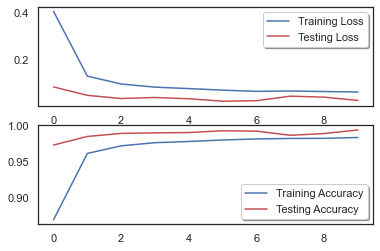

In [119]:
fig, ax = plt.subplots(2,1)

ax[0].plot(cnn.history['loss'], color='b', label="Training Loss")
ax[0].plot(cnn.history['val_loss'], color='r', label="Testing Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(cnn.history['accuracy'], color='b', label="Training Accuracy")
ax[1].plot(cnn.history['val_accuracy'], color='r',label="Testing Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [120]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)

y_test = np.argmax(y_test,axis = 1)

In [122]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[410,   0,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0, 483,   0,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0, 402,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0, 416,   0,   0,   0,   0,   2,   0],
       [  0,   0,   1,   0, 454,   0,   1,   0,   0,   5],
       [  0,   0,   0,   1,   0, 367,   2,   0,   1,   1],
       [  0,   0,   0,   0,   0,   0, 412,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0, 446,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0,   0, 381,   0],
       [  1,   0,   0,   0,   1,   0,   0,   2,   0, 405]], dtype=int64)

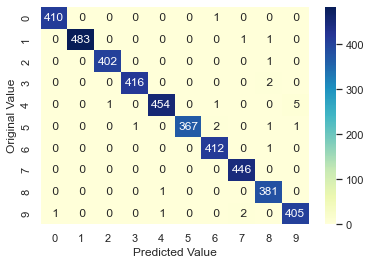

In [135]:
sns.heatmap(cm, annot=True, fmt='2.0f', cmap="YlGnBu")
plt.xlabel("Predicted Value")
plt.ylabel("Original Value")
plt.show()

In [139]:
# Predictions for Test Dataset
y_pred_test = model.predict(test)
y_pred_test = np.argmax(y_pred_test,axis = 1)
y_pred_test

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [143]:
submission_df = pd.DataFrame()
submission_df["ImageId"] = np.arange(1, 28001, 1)
submission_df["Label"] = y_pred_test

submission_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [144]:
submission_df.to_csv("submission.csv",index=False)